In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

# Load LE4PD code

For now the code _only_ supports protein molecules. So from the LE4PD package we'll import __protein__ from the __molecule__ class.

In [2]:
from LE4PD.molecule import protein

### Load trajectory data

The LE4PD analysis can be performed from simulation data. All trajectories must be prepared in advanced. This includes __fixing broken bonds__, __correcting periodic boundaries__, __removing translational motion__, and __removing rotational motion__.

Additionally, because the given simulation contains a non-standard atom-types (Zinc: ZZ), employ the `skip_atoms` feature with an array of atom strings to _skip_ from the simulation. Residues can also be skipped by using the `skip_residues`. 

In [3]:
traj_file = "./traj.xtc"
top_file = "./top.gro"
mol = protein(traj=traj_file,top=top_file, skip_atoms=["ZZ"])

### Calculate Alpha Carbon Center of Mass $(C^{COM}_\alpha)$

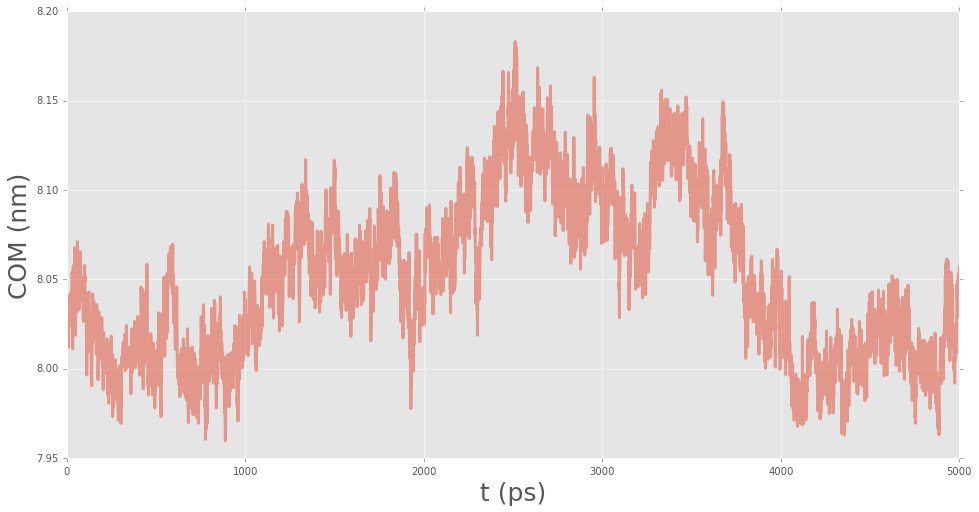

In [4]:
mol.calculate_COM()
plt.figure(figsize=(16,8))
plt.plot(np.arange(mol.n_conformers), np.linalg.norm(mol.com, axis=1), linewidth=3, alpha=0.5)
plt.xlabel(r't (ps)', fontsize=25)
plt.ylabel(r'COM (nm)' , fontsize=25)
plt.show()

### Calculate RMSD

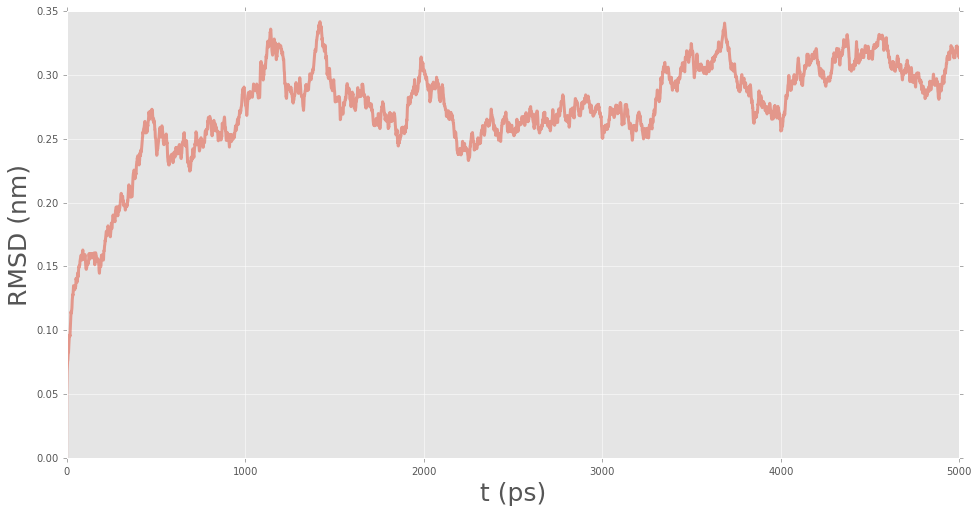

In [5]:
mol.calculate_rmsd()
plt.figure(figsize=(16,8))
plt.plot(np.arange(mol.n_conformers), mol.rmsd, linewidth=3, alpha=0.5)
plt.xlabel(r't (ps)', fontsize=25)
plt.ylabel(r'RMSD (nm)' , fontsize=25)
plt.show()

### Prediction the trajectory dynamics
Predicting the dynamics of the trajectory should use portions of the trajectory which have converged. As the dynamics in the RMSD do not converge until around 2100ps, set `t0=2100`, and we will sampled until `tf=2500`.

In [6]:
mol.predict(t0=2100, tf=2500)

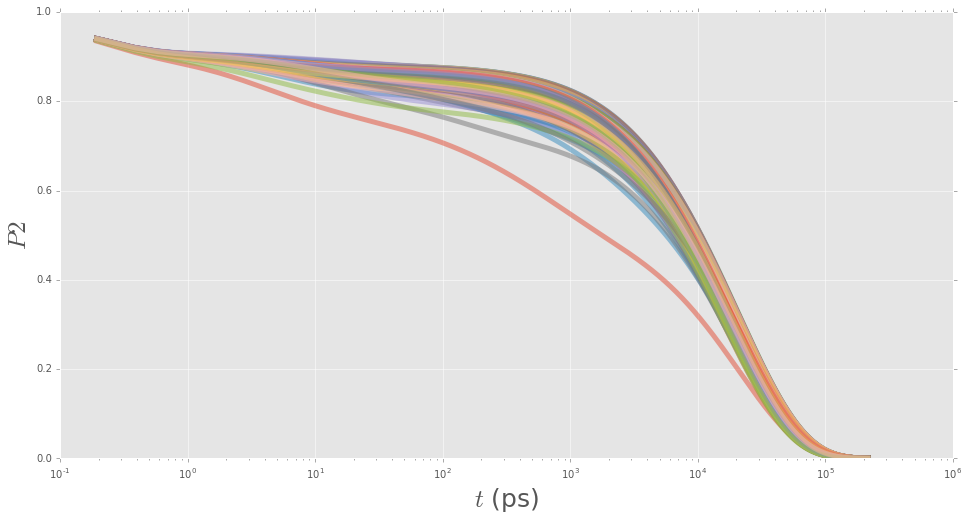

In [7]:
plt.figure(figsize=(16,8))
plt.plot(mol.dynamics.P2[2:,0], mol.dynamics.P2[2:,1:], linewidth=5, alpha=0.5)
plt.xlabel(r'$t$ (ps)', fontsize=25);plt.xscale('log');plt.autoscale('tight')
plt.ylabel(r'$P2$', fontsize=25);plt.ylim(0,1)
plt.show()

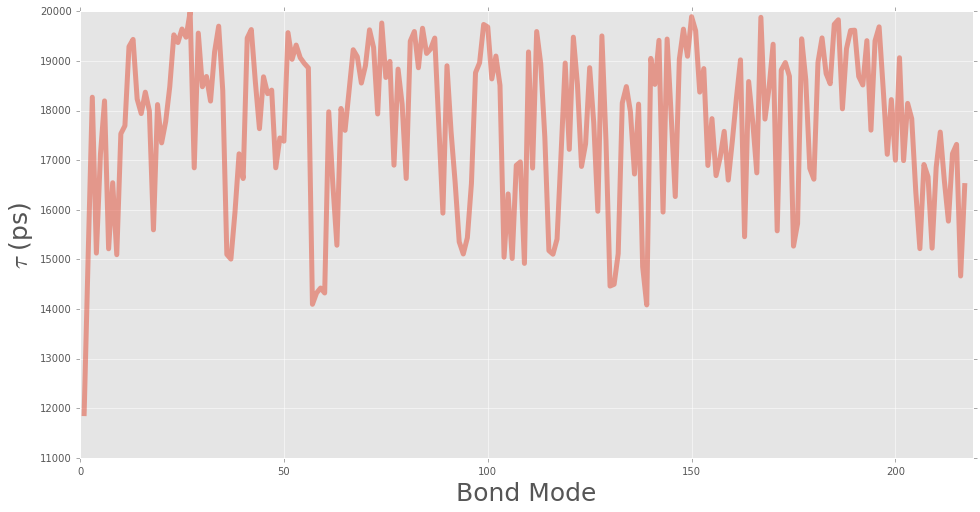

In [8]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(1,mol.n_residues), mol.dynamics.tau, linewidth=5, alpha=0.5)
plt.xlabel(r'Bond Mode', fontsize=25);plt.xlim(0,mol.n_residues+1)
plt.ylabel(r'$\tau$ (ps)', fontsize=25)
plt.show()

In [9]:
mol.dynamics.calculate_NMR_observables

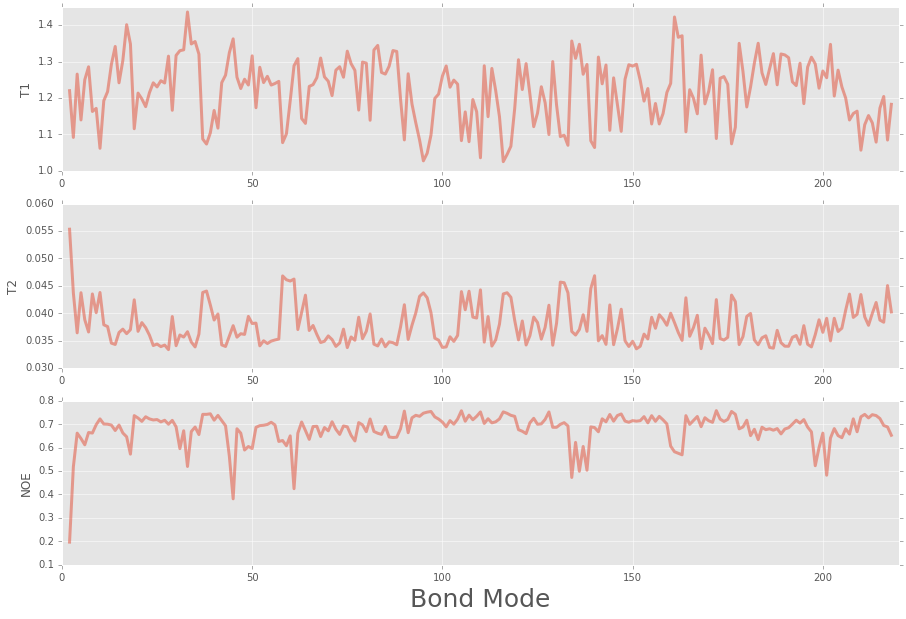

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(np.arange(2,mol.n_residues+1), mol.dynamics.T1, linewidth=3, alpha=0.5)
plt.xlim(0,mol.n_residues+2)
plt.ylabel(r'T1')
plt.subplot(3,1,2)
plt.plot(np.arange(2,mol.n_residues+1), mol.dynamics.T2, linewidth=3, alpha=0.5)
plt.xlim(0,mol.n_residues+2)
plt.ylabel(r'T2')
plt.subplot(3,1,3)
plt.plot(np.arange(2,mol.n_residues+1), mol.dynamics.NOE, linewidth=3, alpha=0.5)
plt.xlabel(r'Bond Mode', fontsize=25);plt.xlim(0,mol.n_residues+2)
plt.ylabel(r'NOE')
plt.show()

### Save mode lengths to pdb structures

All `protein.dynamics` objects contain a `save_modes_pdb` method which saves up to `max_conf` conformations, and sets from 4 to `max_mode` number of mode lengths as the B-factor term. These files can be visualized in PyMol using `cartoon putty`, or in VMD by setting the graphic representaton to $\beta$-factor.

PyMol:
>    `load mode_?.pdb`

>    `hide lines`

>    `show cartoon`

>    `cartoon putty`

>    `spectrum b, rainbow`

In [11]:
import subprocess
subprocess.call('mkdir modes/', shell=True)
mol.dynamics.save_modes_pdb(max_mode=10, max_conf=50)
subprocess.call('mv mode_*.pdb modes/', shell=True)

0